<a href="https://colab.research.google.com/github/MysterionNY/Kurs259_Machine_Learning/blob/main/demos/dimensionality_reduction_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/main/demos/Dimensionality%20Reduction%20Demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

![image](https://www.researchgate.net/profile/Shohal-Hossain-2/publication/367220930/figure/fig1/AS:11431281113694842@1674035105600/Three-species-of-IRIS-flower.jpg)  

# Dimensionality Reduction

The following is a small demonstration of PCa and some practical applications for the method

In [31]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)


print(pca.explained_variance_ratio_)




[0.99244289 0.00755711]


## Visualizing 4D data
### Idea 1

3D Plot with 4th dimension encoded as colour / point size / symbol.

In [32]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['sepal length']
y = df['sepal width']
z = df['petal length']
s = df['petal width']
c = df['target']
colors = {'Iris-setosa':"red", 'Iris-versicolor':"blue", 'Iris-virginica':"green"}
print(c.unique())

ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
ax.set_zlabel("petal length")

ax.scatter(x, y, z, s = df['petal width']*15 , c=c.map(colors))

plt.show()

<IPython.core.display.Javascript object>

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Idea 2: Principal Component Analysis
Principal Component Analysis (PCA) attempts to identify the principal components (called "eigenvectors") that best describe the variance in the data using these PCs, we can visualize points in a lower dimension (*d*) by only using a combination of the first *d* PCs.

In [34]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
iris = datasets.load_iris(as_frame=True)

X = iris.data
y = iris.target
target_names = iris.target_names
print (X.shape)
sns.pairplot(data=iris.frame, hue='target')

(150, 4)


<IPython.core.display.Javascript object>

Calculate the variance explained by each PC:

In [35]:

pca = PCA(n_components=4)
X_r = pca.fit_transform(X)


# Percentage of variance explained for each component
print(
    "explained variance ratio for each component: %s"
    % str(pca.explained_variance_ratio_)
)

print("\ntotal variance explained by first 2 components:\n%f" %sum(pca.explained_variance_ratio_[:2]))


explained variance ratio for each component: [0.92461872 0.05306648 0.01710261 0.00521218]

total variance explained by first 2 components:
0.977685


In [36]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
"""
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")
"""
plt.show()

<IPython.core.display.Javascript object>

In [37]:
# Generates the base diagram
# PCA example
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# There is nearly a linear shape
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')


(np.float64(-3.5747762021625755),
 np.float64(4.146617880369812),
 np.float64(-1.3979780043923693),
 np.float64(1.5061719006590266))

In [38]:
# Drawing Vector arrow
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')


(np.float64(-3.5747762021625755),
 np.float64(4.146617880369812),
 np.float64(-1.3979780043923693),
 np.float64(1.5061719006590266))

original shape:    (200, 2)
transformed shape: (200, 1)


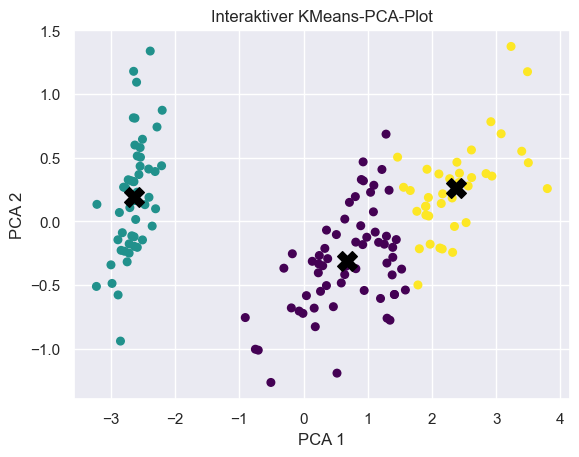

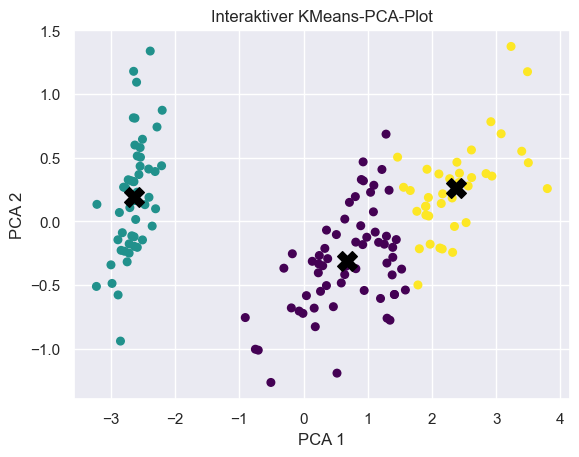

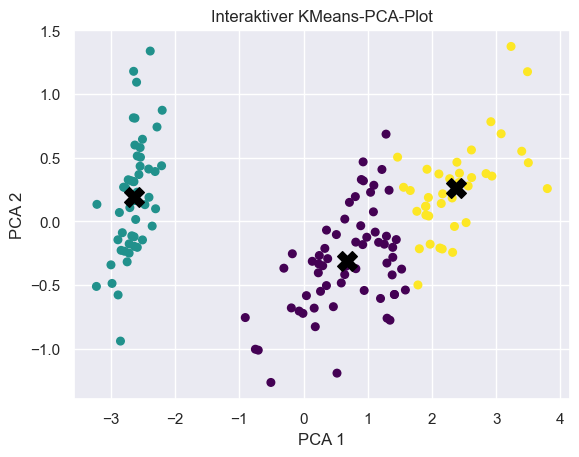

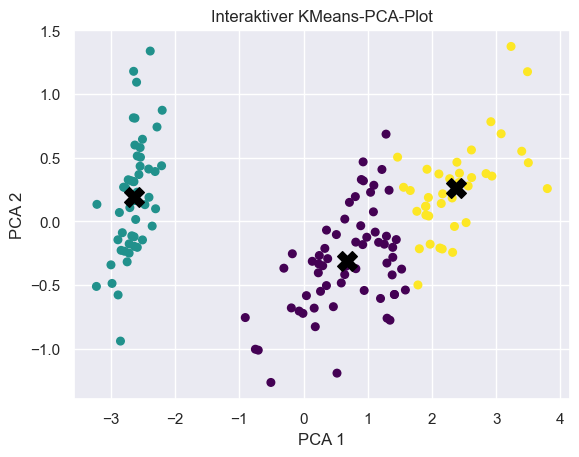

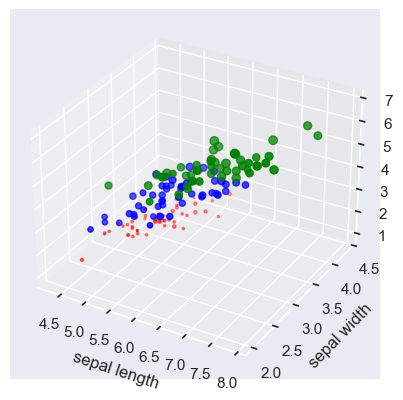

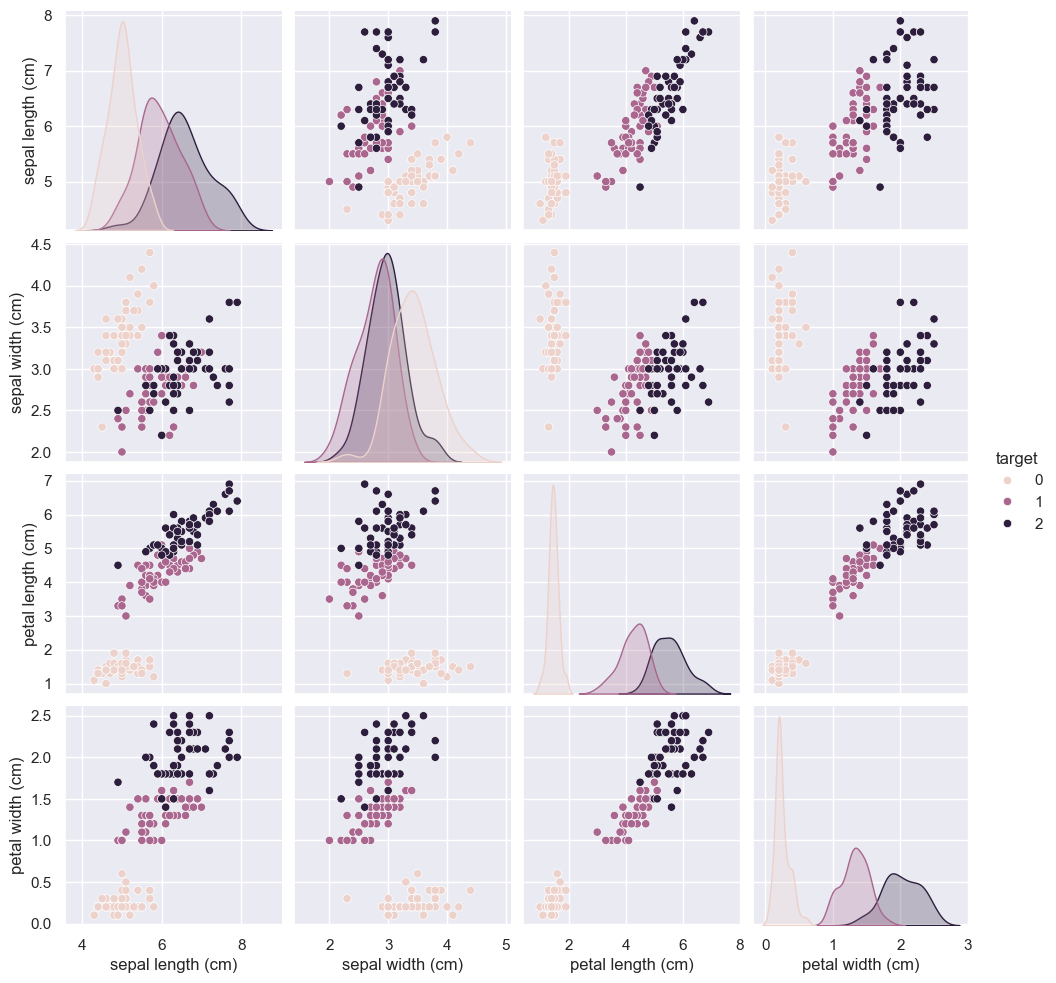

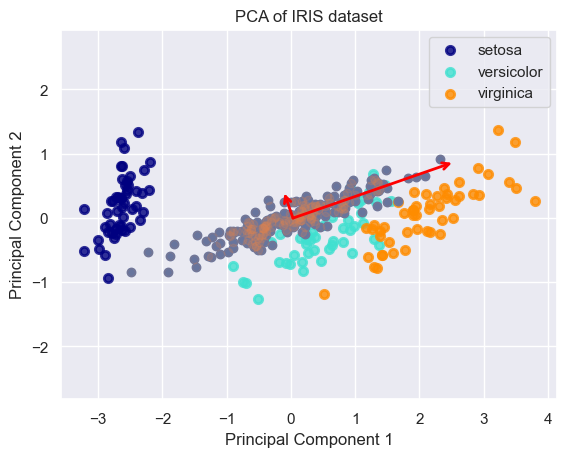

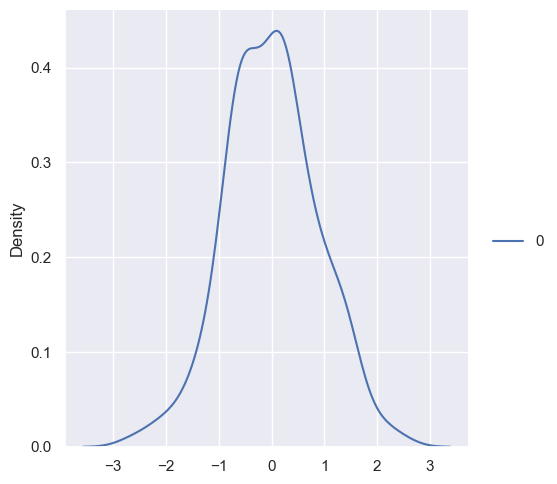

In [39]:
# Removing axis:
# When using it for recuding the dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape) # Reduced to onl
sns.displot(X_pca,kind="kde")

(np.float64(-2.731158226766438),
 np.float64(2.609901883259333),
 np.float64(-0.9672765706389316),
 np.float64(1.006064230853995))

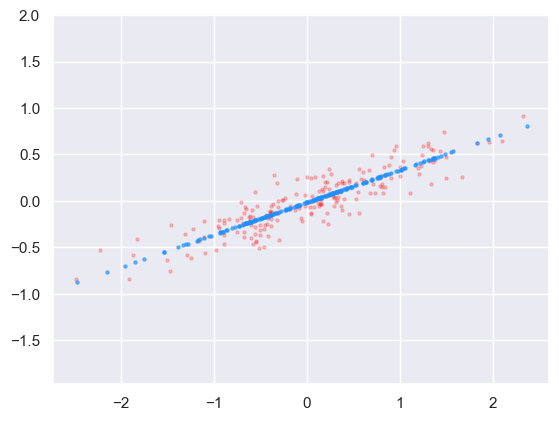

In [40]:

# Convert to PCA and draw the original version in red
# To get a better picture let's reverse the entire thing and plot the PCA version and the original version
# All points get pulled to the new axis and the machine still has a good idea of where the cluser is located.
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color="red", s =5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.6,  color="dodgerblue", s =5)
plt.axis('equal')


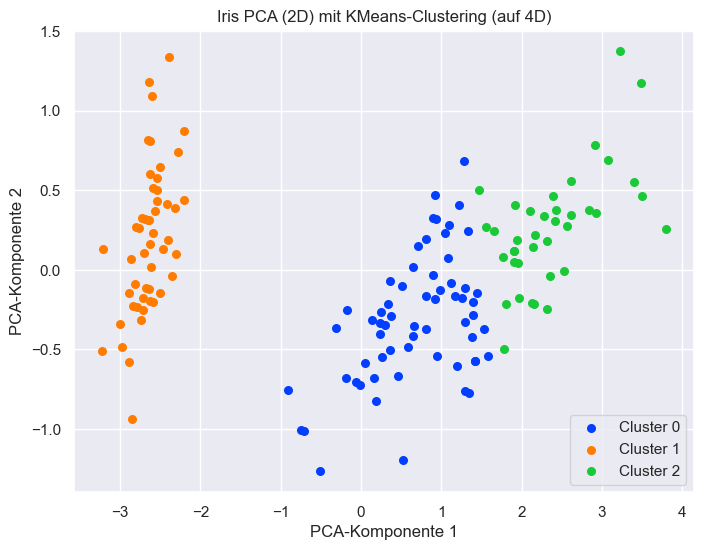

In [41]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Lade den Iris-Datensatz (4D)
iris = datasets.load_iris()
X = iris.data  # Shape (150, 4)
y = iris.target  # Echte Labels
target_names = iris.target_names

# 2. PCA auf 2D reduzieren
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. KMeans auf die 4D-Daten anwenden (nicht auf 2D, sonst wäre es nur Visualisierung!)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 4. Visualisierung im 2D PCA-Raum mit KMeans-Labels
plt.figure(figsize=(8, 6))
palette = sns.color_palette("bright", 3)

for cluster in range(3):
    cluster_points = X_pca[kmeans_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                s=30, label=f"Cluster {cluster}", color=palette[cluster])

plt.title("Iris PCA (2D) mit KMeans-Clustering (auf 4D)")
plt.xlabel("PCA-Komponente 1")
plt.ylabel("PCA-Komponente 2")
plt.legend()
plt.grid(True)
plt.show()


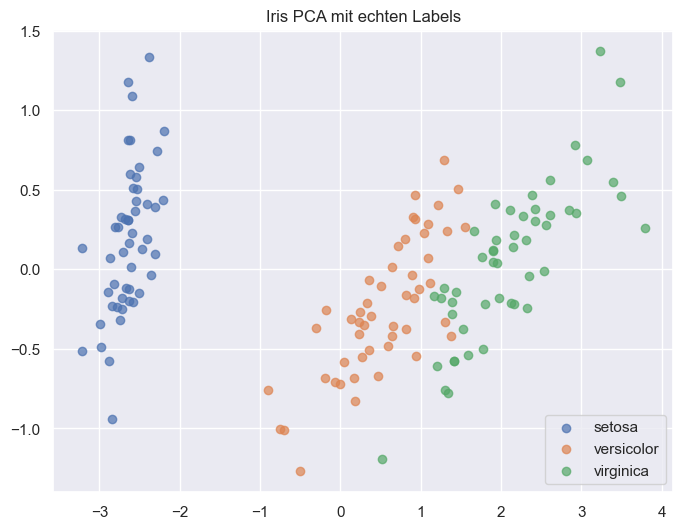

In [42]:
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7)
plt.title("Iris PCA mit echten Labels")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import torch

# Daten laden und vorbereiten
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import seaborn as sns

iris = datasets.load_iris()
X = iris.data
y_true = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
cluster_centers_2d = pca.transform(kmeans.cluster_centers_)

# Plot vorbereiten
fig, ax = plt.subplots()
palette = sns.color_palette("bright", 3)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, s=30, cmap='viridis')
ax.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], c='black', marker='X', s=200)

ax.set_title("Interaktiver KMeans-PCA-Plot")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")

# Interaktive Elemente merken
highlight_marker = None
lines = []
texts = []
click_radius = 0.05

# Klick-Funktion
def onclick(event):
    global highlight_marker, lines, texts

    if event.xdata is None or event.ydata is None:
        return

    click_coords = np.array([event.xdata, event.ydata])
    distances = np.linalg.norm(X_pca - click_coords, axis=1)
    nearest_idx = np.argmin(distances)

    if distances[nearest_idx] > click_radius:
        print("❌ Kein Punkt in der Nähe.")
        return

    clicked_point = X_pca[nearest_idx]

    # Alte Markierungen entfernen
    if highlight_marker:
        highlight_marker.remove()
    for l in lines:
        l.remove()
    for t in texts:
        t.remove()
    lines.clear()
    texts.clear()

    # Neuer Punkt markieren
    highlight_marker = ax.plot(clicked_point[0], clicked_point[1], 'ko')[0]

    # Distanz zu jedem Clusterzentrum
    for i, center in enumerate(cluster_centers_2d):
        dist = np.linalg.norm(clicked_point - center)
        line = ax.plot([clicked_point[0], center[0]], [clicked_point[1], center[1]], 'gray', linestyle='--')[0]
        text = ax.text((clicked_point[0] + center[0]) / 2,
                       (clicked_point[1] + center[1]) / 2 + 0.02,
                       f"{dist:.2f}",
                       fontsize=8,
                       color='black')
        lines.append(line)
        texts.append(text)

    fig.canvas.draw()

# Event aktivieren
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()


<IPython.core.display.Javascript object>

In [44]:
# Mapping von Cluster-Labels zu echten Labels via Modus
mapped_labels = np.zeros_like(kmeans_labels)
for i in range(3):
    mask = (kmeans_labels == i)
    mapped_labels[mask] = mode(y_true[mask])[0]

# Genauigkeit berechnen
accuracy = accuracy_score(y_true, mapped_labels)
print(f"✅ Korrekt zugewiesene Punkte: {accuracy*100:.2f}%")


✅ Korrekt zugewiesene Punkte: 89.33%
